In [7]:
import pandas as pd
import numpy as np

In [8]:
penguins_df = pd.read_csv("https://raw.githubusercontent.com/mcnakhaee/palmerpenguins/master/palmerpenguins/data/penguins-raw.csv")
penguins_df.head(3)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN


In [9]:
# Example: We want to change "MALE", "FEMALE" --> 0, 1 where 1 = Penguin is a Female
# .apply()

# It allows the user to apply self-written functions onto a Pandas DataFrame, Series (column), etc. 

def change_to_binary(sex):
    
    if pd.isnull(sex):
        return np.NaN
    elif sex == "MALE":
        return 0
    elif sex == "FEMALE":
        return 1
    

penguins_df["Sex_Binary"] = penguins_df["Sex"].apply(change_to_binary)
penguins_df["Sex_Binary"]

0      0.0
1      1.0
2      1.0
3      NaN
4      1.0
      ... 
339    0.0
340    1.0
341    0.0
342    0.0
343    1.0
Name: Sex_Binary, Length: 344, dtype: float64

In [10]:
penguins_df["Sex"]

0        MALE
1      FEMALE
2      FEMALE
3         NaN
4      FEMALE
        ...  
339      MALE
340    FEMALE
341      MALE
342      MALE
343    FEMALE
Name: Sex, Length: 344, dtype: object

In [12]:
# GroupBy 

penguins_df.groupby("Species")["Body Mass (g)"].mean()

Species
Adelie Penguin (Pygoscelis adeliae)          3700.662252
Chinstrap penguin (Pygoscelis antarctica)    3733.088235
Gentoo penguin (Pygoscelis papua)            5076.016260
Name: Body Mass (g), dtype: float64

<AxesSubplot:xlabel='Species'>

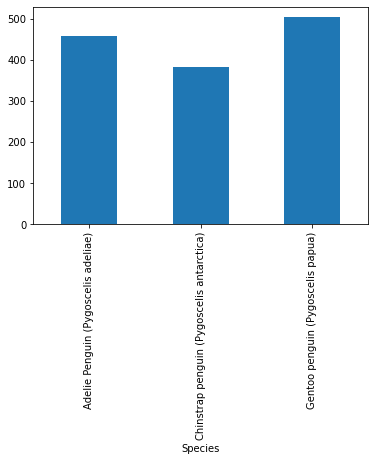

In [17]:
(penguins_df.groupby("Species")["Body Mass (g)"].std()).plot(kind = "bar")

In [14]:
penguins_df.groupby("Species")["Body Mass (g)"].sum()

Species
Adelie Penguin (Pygoscelis adeliae)          558800.0
Chinstrap penguin (Pygoscelis antarctica)    253850.0
Gentoo penguin (Pygoscelis papua)            624350.0
Name: Body Mass (g), dtype: float64